# Regression Model

Written by  :  Hasan Omeis

Date        :  May 2023

Contact     :  https://www.linkedin.com/in/hasan-omeis-b9b431262/

______

Here is Data which is about Oil prices & its details in Brazil for 15 years, between 2004 & 2019.

We are going to read the data, do data processing, then make a model to predict the (mean price) depend on other features.



# Data Loading

so we are going first to import needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

____

and since the features are written in portuguese , I translated them to English so we can understand them 


In [ ]:
col_names = ['Index','Initial Date','Final Date','Region','State','Product','Number of searches','Unit of Measurment',
           'Mean Price','Default Price','Minimum Price','Maximum Price','Mean Margin','Price Standar Deviation','Mean Price Distribution',
           'Default Price Distribution','Minimum Price Distribution','Maximum Price Distribution','Distribution Standard Deviation',
           'M Factor' ,'Year']

data = pd.read_excel('/content/2004-2019.xls' , names = col_names)  

data.head()

,Index,Initial Date,Final Date,Region,State,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,...,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


How about the Shape ? 

In [ ]:
data.shape

(65534, 21)

since 'Index' will do nothing in the data , lets drop it

In [ ]:
data.drop(['Index'],axis=1, inplace=True)

then check data 

In [ ]:
data.head()

,Initial Date,Final Date,Region,State,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


__________


# Data Processing

now we need to know more about he data, lets use describe tool

In [ ]:
data.describe()

,Number of searches,Mean Price,Default Price,Minimum Price,Maximum Price,Price Standar Deviation,M Factor,Year
count,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000
mean,276.064302,9.419979,0.500583,8.258743,10.728551,0.044842,6.509613,2008.929243
std,459.770339,14.292417,0.884875,12.383575,16.388597,0.024480,3.474459,2.925159
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000,1.000000,2004.000000
25%,55.000000,1.863000,0.063000,1.740000,2.100000,0.029000,3.000000,2006.000000
50%,119.000000,2.288000,0.099000,2.110000,2.580000,0.041000,7.000000,2009.000000
75%,292.000000,2.852000,0.171000,2.689000,3.190000,0.059000,10.000000,2012.000000
max,4167.000000,52.949000,7.042000,47.000000,70.000000,0.395000,12.000000,2014.000000


it`s clear that python will not calculate categorical data , only numerical values ,  also it looks we need to standrardize the numbers , but this will be done later

now lets check the types of features & to check if it contain nulls

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Initial Date                     65534 non-null  datetime64[ns]
 1   Final Date                       65534 non-null  datetime64[ns]
 2   Region                           65534 non-null  object        
 3   State                            65534 non-null  object        
 4   Product                          65534 non-null  object        
 5   Number of searches               65534 non-null  int64         
 6   Unit of Measurment               65534 non-null  object        
 7   Mean Price                       65534 non-null  float64       
 8   Default Price                    65534 non-null  float64       
 9   Minimum Price                    65534 non-null  float64       
 10  Maximum Price                    65534 non-null  float64  

________

we`re lucky to have no Null data , but it looks that several features its type is (object) . which might contain letters & numbers together 


lets first check 'Mean Margin' feature , which written here as Object , instead of float64


In [ ]:
data['Mean Margin']

0        0.463
1        0.399
2        0.419
3        0.432
4         0.24
         ...  
65529    0.142
65530    0.304
65531    0.341
65532     0.25
65533    0.267
Name: Mean Margin, Length: 65534, dtype: object

________

it looks that some rows contain (-) which might refer to the null value , lets see how many (-) exists


In [ ]:
n = 0
for i in range(data.shape[0]) : 
    if str(data['Mean Margin'][i]) == '-' : 
        n+=1

print('There is {} null value here'.format(n))
    

There is 1493 null value here


______

around 1500 null value in Mean Margin only , so lets use simple equation to fill the nulls

In [ ]:
summ = 0
n = 0

for i in range(data.shape[0]) : 
    if not str(data['Mean Margin'][i]) == '-' : 
        summ += float(data['Mean Margin'][i])
        n+=1

the_mean = summ/ n

print('the mean is {}'.format(the_mean))

for i in range(data.shape[0]) : 
    if str(data['Mean Margin'][i]) == '-' : 
      data['Mean Margin'][i] = the_mean
        


the mean is 1.7522229353070857


<ipython-input-14-7e33a4ec58d1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mean Margin'][i] = the_mean


_____

now lets check if there is any nulls exists

In [ ]:
n = 0
for i in range(data.shape[0]) : 
    if str(data['Mean Margin'][i]) == '-' : 
        n+=1

print('There is {} null value here'.format(n))

There is 0 null value here


___________


great . now lets check if it become "float64" or not yet 


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Initial Date                     65534 non-null  datetime64[ns]
 1   Final Date                       65534 non-null  datetime64[ns]
 2   Region                           65534 non-null  object        
 3   State                            65534 non-null  object        
 4   Product                          65534 non-null  object        
 5   Number of searches               65534 non-null  int64         
 6   Unit of Measurment               65534 non-null  object        
 7   Mean Price                       65534 non-null  float64       
 8   Default Price                    65534 non-null  float64       
 9   Minimum Price                    65534 non-null  float64       
 10  Maximum Price                    65534 non-null  float64  

________

although it's still written here as object , let's check if any cell contain non-numbers here




In [ ]:
n = 0
for i in range(data.shape[0]) : 
    if float(data['Mean Margin'][i]) == 0 : 
        n+=1

print('There is {} cell with zero value'.format(n))

There is 0 cell with zero value


_____

great , now lets repeat the same step in other non-categorical features which written as "Object" ,like  : 

Mean Price Distribution            
Default Price Distribution         
Minimum Price Distribution         
Maximum Price Distribution         
Distribution Standard Deviation    

In [ ]:
a = b = c= d = e  = 0
for i in range(data.shape[0]) : 
    if str(data['Mean Price Distribution'][i]) == '-' : 
        a+=1
    if str(data['Default Price Distribution'][i]) == '-' : 
        b+=1
    if str(data['Minimum Price Distribution'][i]) == '-' : 
        c+=1
    if str(data['Maximum Price Distribution'][i]) == '-' : 
        d+=1
    if str(data['Distribution Standard Deviation'][i]) == '-' :  
        e+=1

print('There is {} null value here'.format(a))
print('There is {} null value here'.format(b))
print('There is {} null value here'.format(c))                
print('There is {} null value here'.format(d))
print('There is {} null value here'.format(e))                
    

There is 1471 null value here
There is 1471 null value here
There is 1471 null value here
There is 1471 null value here
There is 1471 null value here


______

Then lets make the mean in those cells in the same way  (this might take few mins)

In [ ]:
a_summ = b_summ = c_summ = d_summ = e_summ = 0
n = 1471

for i in range(data.shape[0]) : 
    if not str(data['Mean Price Distribution'][i]) == '-' : 
        a_summ += float(data['Mean Price Distribution'][i])
        
    if not str(data['Default Price Distribution'][i]) == '-' : 
        b_summ += float(data['Default Price Distribution'][i])

    if not str(data['Minimum Price Distribution'][i]) == '-' : 
        c_summ += float(data['Minimum Price Distribution'][i])
        
    if not str(data['Maximum Price Distribution'][i]) == '-' : 
        d_summ += float(data['Maximum Price Distribution'][i])
        
    if not str(data['Distribution Standard Deviation'][i]) == '-' : 
        e_summ += float(data['Distribution Standard Deviation'][i])
        

      
        
a_mean = a_summ/ n
b_mean = b_summ/ n
c_mean = c_summ/ n
d_mean = d_summ/ n
e_mean = e_summ/ n

for i in range(data.shape[0]) : 
    if str(data['Mean Price Distribution'][i]) == '-' : 
        data['Mean Price Distribution'][i] = a_mean

    if str(data['Default Price Distribution'][i]) == '-' : 
        data['Default Price Distribution'][i] = b_mean
        
    if str(data['Minimum Price Distribution'][i]) == '-' : 
        data['Minimum Price Distribution'][i] = c_mean
        
    if str(data['Maximum Price Distribution'][i]) == '-' : 
        data['Maximum Price Distribution'][i] = d_mean
    
    if str(data['Distribution Standard Deviation'][i]) == '-' : 
        data['Distribution Standard Deviation'][i] = e_mean
        



        

<ipython-input-19-605788b83007>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mean Price Distribution'][i] = a_mean
<ipython-input-19-605788b83007>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Default Price Distribution'][i] = b_mean
<ipython-input-19-605788b83007>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Minimum Price Distribution'][i] = c_mean
<ipython-input-19-605788b83007>:40: SettingWithCopyWarn

____________________

# Categorical Features

now lets move to convert Categorical features , into numerical values , so we can enter them in the model

we have 4 Categorical features , which are : 

Region  ,  State    ,   Product    ,   Unit of Measurment


so in each feature , we'll check unique values , then convert it using dictionary & map fucntion , in a new column , and them drop the original column

let's start with Region : 


In [ ]:
data['Region'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

In [ ]:
Region_dict = {'CENTRO OESTE': 0,'NORDESTE':1, 'NORTE':2, 'SUDESTE':3, 'SUL':4}
data['Region Code'] = data['Region'].map(Region_dict)

data.drop(['Region'],axis=1, inplace=True)




now lets check the data itsself 


In [ ]:
data.head()

,Initial Date,Final Date,State,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code
0,2004-05-09,2004-05-15,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004,0
1,2004-05-09,2004-05-15,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004,0
2,2004-05-09,2004-05-15,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004,0
3,2004-05-09,2004-05-15,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004,0
4,2004-05-09,2004-05-15,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004,1



___________________

now lets repeat it in State 


In [ ]:
data['State'].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [ ]:
State_dict = {'DISTRITO FEDERAL':0, 'GOIAS':1, 'MATO GROSSO':2, 'MATO GROSSO DO SUL':3,
       'ALAGOAS':4, 'BAHIA':5, 'CEARA':6, 'MARANHAO':7, 'PARAIBA':8, 'PERNAMBUCO':9,
       'PIAUI':10, 'RIO GRANDE DO NORTE':11, 'SERGIPE':12, 'ACRE':13, 'AMAPA':14,
       'AMAZONAS':15, 'PARA':16, 'RONDONIA':17, 'RORAIMA':18, 'TOCANTINS':19,
       'ESPIRITO SANTO':20, 'MINAS GERAIS':21, 'RIO DE JANEIRO':22, 'SAO PAULO':23,
       'PARANA':24, 'RIO GRANDE DO SUL':25, 'SANTA CATARINA':26}
data['State Code'] = data['State'].map(State_dict)

data.drop(['State'],axis=1, inplace=True)

data.head()


,Initial Date,Final Date,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code,State Code
0,2004-05-09,2004-05-15,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004,0,0
1,2004-05-09,2004-05-15,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004,0,1
2,2004-05-09,2004-05-15,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004,0,2
3,2004-05-09,2004-05-15,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004,0,3
4,2004-05-09,2004-05-15,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004,1,4


In [ ]:
data['Product'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'أ“LEO DIESEL',
       'أ“LEO DIESEL S10'], dtype=object)


_________

then Product . . 


In [ ]:
Product_dict = {'ETANOL HIDRATADO':0, 'GASOLINA COMUM':1, 'GLP':2, 'GNV':3, 'أ“LEO DIESEL':4,
       'أ“LEO DIESEL S10':5}

data['Product Code'] = data['Product'].map(Product_dict)

data.drop(['Product'],axis=1, inplace=True)

data.head()

,Initial Date,Final Date,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code,State Code,Product Code
0,2004-05-09,2004-05-15,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004,0,0,0
1,2004-05-09,2004-05-15,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004,0,1,0
2,2004-05-09,2004-05-15,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004,0,2,0
3,2004-05-09,2004-05-15,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004,0,3,0
4,2004-05-09,2004-05-15,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004,1,4,0



_________

and Unit of measurment

In [ ]:
data['Unit of Measurment'].unique()

array(['R$/l', 'R$/13Kg', 'R$/m3'], dtype=object)

In [ ]:
Unit_dict = {'R$/l':0, 'R$/13Kg':1, 'R$/m3':2}

data['Unit Code'] = data['Unit of Measurment'].map(Unit_dict)

data.drop(['Unit of Measurment'],axis=1, inplace=True)

data.head()

,Initial Date,Final Date,Number of searches,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code,State Code,Product Code,Unit Code
0,2004-05-09,2004-05-15,127,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004,0,0,0,0
1,2004-05-09,2004-05-15,387,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004,0,1,0,0
2,2004-05-09,2004-05-15,192,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004,0,2,0,0
3,2004-05-09,2004-05-15,162,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004,0,3,0,0
4,2004-05-09,2004-05-15,103,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004,1,4,0,0




________

# Handling Date 

since we have here 2 columns for date , which is Initial date & Final Date , let;s first check how many rows when the year at those two columns are mismatch 


In [ ]:
mismatch=0
for i in range(data.shape[0])  : 
    if not (int(data['Initial Date'][i].year)  == int(data['Final Date'][i].year)) :
        mismatch +=1
        
print( 'Year mismatch amount is {}'.format(mismatch))

Year mismatch amount is 1042


____

since it's kinda ew number comparing with the 65 thousand rows , so we can use only one of them , which will be the Final Date

also since the Day will not affect so much in the price , so let's only use the month & the year in 2 new separated columns

In [ ]:
Years = []
Months = []
for i in range(data.shape[0])  : 
    Years.append(str(data['Final Date'][i])[:4])
    Months.append(str(data['Final Date'][i])[5:7])       

In [ ]:
data['Final Year'] = Years
data['Final Months'] = Months

data.drop(['Initial Date','Final Date','Year'],axis=1, inplace=True)




now lets  check the final data 


In [ ]:
data.head()

,Number of searches,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Region Code,State Code,Product Code,Unit Code,Final Year,Final Months
0,127,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,0,0,0,0,2004,05
1,387,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,0,1,0,0,2004,05
2,192,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,0,2,0,0,2004,05
3,162,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,0,3,0,0,2004,05
4,103,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,1,4,0,0,2004,05



______

# Representing Data

let's have a quick look to few features distribution , using countplot tool from Seaborn library . .


here for Region Code

<Axes: xlabel='Region Code', ylabel='count'>

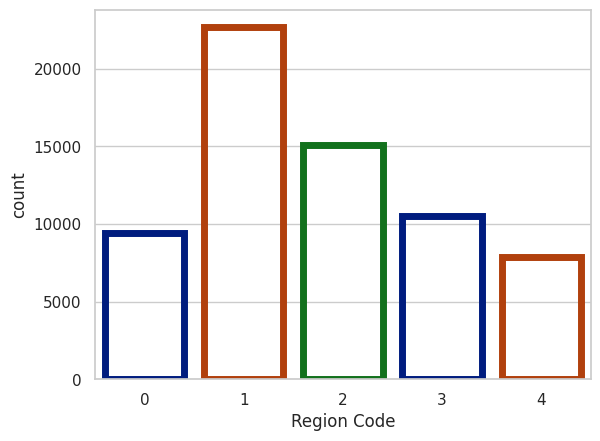

In [ ]:
sns.countplot(x="Region Code", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))



and here for State 

<Axes: xlabel='State Code', ylabel='count'>

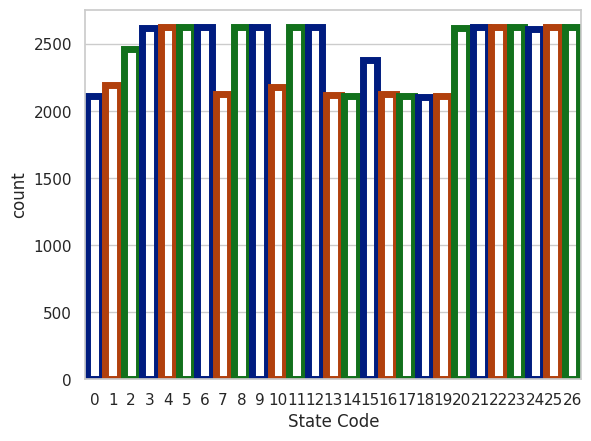

In [ ]:
sns.countplot(x="State Code", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))


then the Product

<Axes: xlabel='Product Code', ylabel='count'>

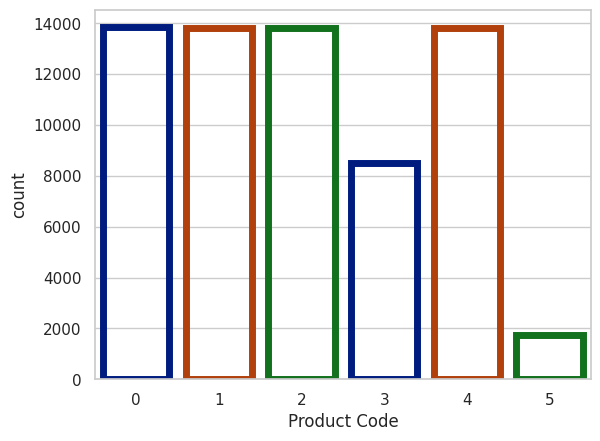

In [ ]:
sns.countplot(x="Product Code", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))


and for the Year

<Axes: xlabel='Final Year', ylabel='count'>

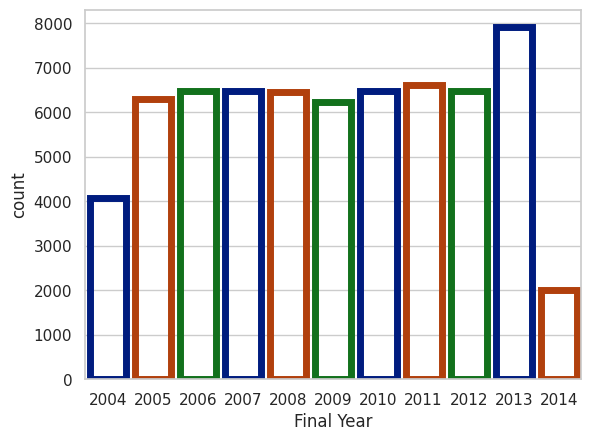

In [ ]:
sns.countplot(x="Final Year", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))


_____________

# Splitting Data


now lets use determine X & y data , then use Sklearn , to split the data into Train & test


In [ ]:
X = data.drop(['Mean Price'], axis=1, inplace=False)
print('X shape is ' , X.shape)
X.head()

X shape is  (65534, 18)


,Number of searches,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Region Code,State Code,Product Code,Unit Code,Final Year,Final Months
0,127,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,0,0,0,0,2004,05
1,387,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,0,1,0,0,2004,05
2,192,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,0,2,0,0,2004,05
3,162,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,0,3,0,0,2004,05
4,103,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,1,4,0,0,2004,05


In [ ]:
y = data['Mean Price']

print('y shape is ' , y.shape)
y.head()


y shape is  (65534,)


0    1.288
1    1.162
2    1.389
3    1.262
4    1.181
Name: Mean Price, dtype: float64

___

then split it

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)


print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (49150, 18)
X_test shape is  (16384, 18)
y_train shape is  (49150,)
y_test shape is  (16384,)


____

# Building the Model

let's use 3 regerssion Models using Sklearn , to check which is suitable . . 

first use Linear Regression



____

now how about the Train & Test Scores ? 


In [ ]:
print (X_train)

       Number of searches  Default Price  Minimum Price  Maximum Price  \
26524                1475          1.725         26.000         37.000   
35258                 115          1.118         30.000         37.000   
4012                 1077          0.126          1.440          2.260   
12887                  51          0.129          2.370          2.900   
64746                  95          0.168          1.539          2.899   
...                   ...            ...            ...            ...   
49723                 599          0.067          1.949          2.399   
25773                 396          1.655         24.900         35.000   
60145                 720          3.059         31.000         50.000   
3491                    7          0.118          2.050          2.300   
14100                  46          0.171          2.730          3.300   

      Mean Margin  Price Standar Deviation Mean Price Distribution  \
26524       5.678                    0.05

In [ ]:
LinearRegressionModel = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))


Linear Regression Train Score is :  0.9984663922036023
Linear Regression Test Score is :  0.9985163318823426



_____

looks great which might refer to some kind of overfitt , now lets check predicted values

In [ ]:
y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Predicted Value for Linear Regression is :  [38.69705869 40.50106793  2.67158521  2.11160523  1.64262891  2.75695631
  1.481403    2.92850533 32.54062596  2.37254354]


____

now lets move to SVR Model (this will take few mins)


In [ ]:
'''
sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001,
                C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False,max_iter=-1)
'''

SVRModel = SVR(C = 1.0 ,epsilon=1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)


SVR(epsilon=1)

____

how about scores ? 


In [ ]:
print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))

SVRModel Train Score is :  0.5995011340924012



___

looks very far from being suitable choice. . 


and the predicted Values . . 



In [ ]:
#Calculating Prediction
y_pred = SVRModel.predict(X_test)
print('Predicted Value for SVRModel is : ' , y_pred[:10])


____

now let's use Decision Tree Regressor



In [ ]:
'''
sklearn.tree.DecisionTreeRegressor(criterion='mse’, splitter=’best’, max_depth=None,min_samples_split=2,
                                   min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_features=None,
                                   random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                   min_impurity_split=None, presort=False)
'''

DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)


____

calculating Scores 


In [ ]:
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))


___

fine numbers , whih pretty close to the Linear Regression . . 


and Predicted Values

In [ ]:
y_pred = DecisionTreeRegressorModel.predict(X_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:10])

___

# Final


it looks that using Linear Regression , or Decision Tree will be better in prediction the mean price , but may be changing some parameters in other models bring better accuracy . 


Hope you find this kernel useful !
